<a href="https://colab.research.google.com/github/abdalkaderhajjouz/Deep-Learning-Projects/blob/main/Copy_of_Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pytesseract

# Set tesseract path to where the tesseract exe file is located (Edit this path accordingly based on your own settings)


In [ ]:
import pytesseract


In [ ]:
!pip install numpy==1.19.5
!pip install pytesseract==0.3.7

In [ ]:
import pytesseract
from pytesseract import image_to_string
from PIL import Image

In [ ]:
carplate_img = cv2.imread('car_image.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

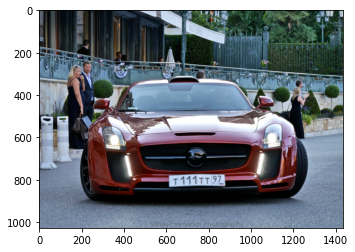

In [ ]:
plt.imshow(carplate_img_rgb);


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [ ]:
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

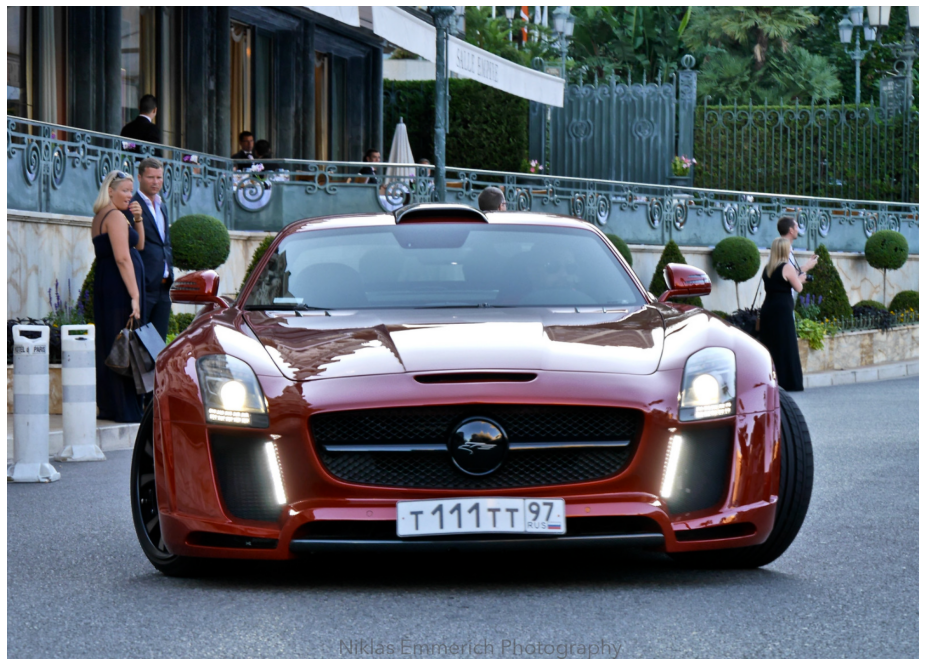

In [ ]:
enlarge_plt_display(carplate_img_rgb, 1.2)


In [ ]:
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')


In [ ]:
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

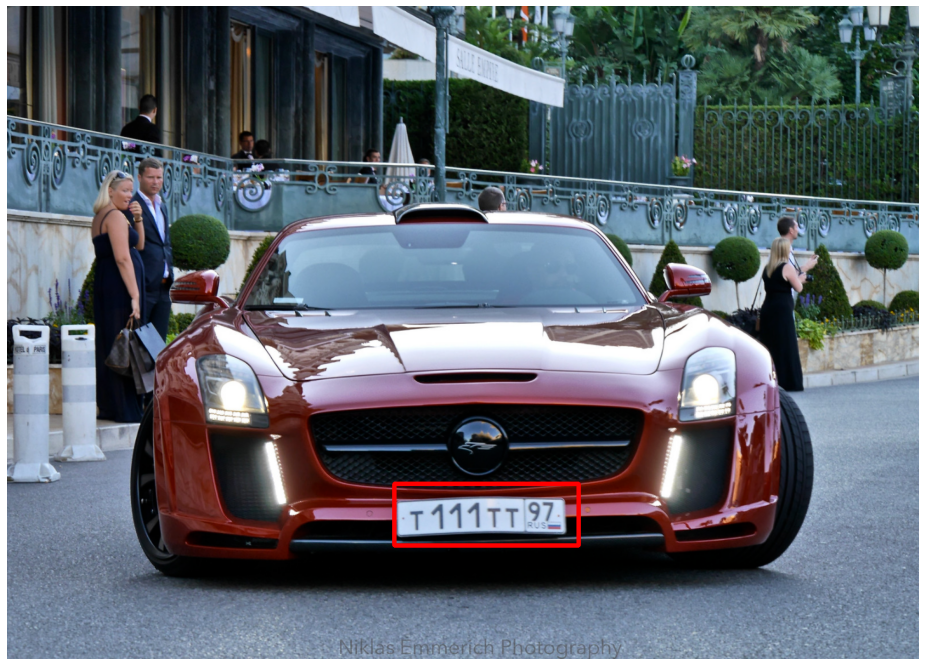

In [ ]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)

In [ ]:
# Function to retrieve only the car plate sub-image itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img

In [ ]:
# Enlarge image for further image processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

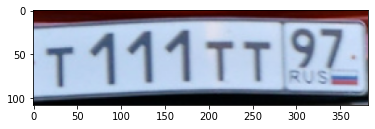

In [ ]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

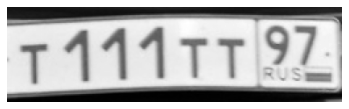

In [ ]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

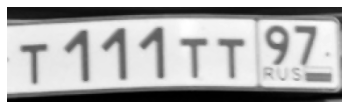

In [ ]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray,config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

T1117 97



In [ ]:
# Testing all PSM values
for i in range(3,14):
    print(f'PSM: {i}')
    print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                      config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
T111TT IZ

PSM: 4
T111TT IZ

PSM: 5
r~!
Oo.
—
_
—
<—
<
-

PSM: 6
T111TT IZ

PSM: 7
T111TT IZ

PSM: 8
T1117 97

PSM: 9
PUTT Teo

PSM: 10
T111TT IZ

PSM: 11
T111TT 92

PSM: 12
T111TT 92

PSM: 13
T1117 97

